In [90]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

In [91]:
tissue_df = pd.read_csv("../psl/data/master_data_percent/is_tissue.txt", 
                        delimiter="\t", header=None)
sensitive_df = pd.read_csv("../psl/data/master_data_percent/essential_overlap/sensitive_truth.txt",
                          delimiter="\t", header=None)

In [92]:
# combine cell-tissue table with cell-drug sensitivity table
def process_data(sens_df, tissue_df):
    sens_df = sens_df.copy()
    for index, row in sens_df.iterrows():
        tissue = tissue_df[tissue_df[0]==row[0]].iloc[0][1]
        sens_df.set_value(index, "tissue", tissue)
        for drug in set(sens_df[1]):
            try:
                sensitivity = sens_df[(sens_df[0]==row[0]) & (sens_df[1]==drug)][2].iloc[0]
                sens_df.set_value(index, drug, sensitivity)
            except:
                sens_df.set_value(index, drug, np.nan)
    sens_df.drop_duplicates(inplace=True, subset=0)
    sens_df.drop(1, axis=1, inplace=True)
    sens_df.drop(2, axis=1, inplace=True)
    sens_df.columns.values[0] = 'cell'
    return sens_df

In [93]:
df = process_data(sensitive_df.copy(), tissue_df)
df = df.reindex_axis(["cell", "tissue"] + sorted(df.columns[2:]), axis=1) # order column alphabetically
print df

     cell tissue        D0        D1       D11       D12       D13       D14  \
0      C1     T3  0.176007  0.925621  0.817438  0.820051  0.520823  0.503728   
1      C5     T0  0.695330  0.972922  0.798543  0.802057  0.671123  0.862554   
2      C7     T9  0.078663  0.838903  0.217138  0.547129       NaN  0.666067   
3     C11    T13  0.079006  0.795801  0.171123  0.345930  0.037232  0.639332   
4     C12     T7  0.251328  0.823051  0.098500  0.368123  0.060497  0.775150   
5     C13     T6  0.014824  0.874979  0.721422  0.790146  0.429177  0.516881   
6     C17     T4  0.318937  0.705356  0.729563  0.840360  0.014824  0.652014   
7     C18    T15  0.090231       NaN  0.641388  0.381748  0.459983  0.741817   
8     C19     T9  0.609854       NaN  0.416367  0.615253  0.259212  0.785947   
9     C23     T8  0.178320  0.772665  0.761440  0.803685  0.200343  0.680034   
10    C32    T14  0.625707  0.787918  0.039417  0.306512  0.014824  0.522365   
11    C33    T14  0.219195       NaN  0.

tissue        T8        T9        T6        T7        T4        T5        T3  \
error   0.287029  0.278163  0.295873  0.267154  0.285690  0.310214  0.266469   
mean    0.471765  0.452411  0.476625  0.484574  0.445156  0.394374  0.528831   

tissue        T0        T1       T14       T15       T17       T10       T12  \
error   0.274260  0.289107  0.279971  0.317162  0.279862  0.272988  0.236058   
mean    0.619807  0.455749  0.385199  0.415572  0.533967  0.502499  0.516938   

tissue       T13      T21       T18       T19  
error   0.280558  0.27606  0.270606  0.251487  
mean    0.424616  0.47625  0.412315  0.507319  


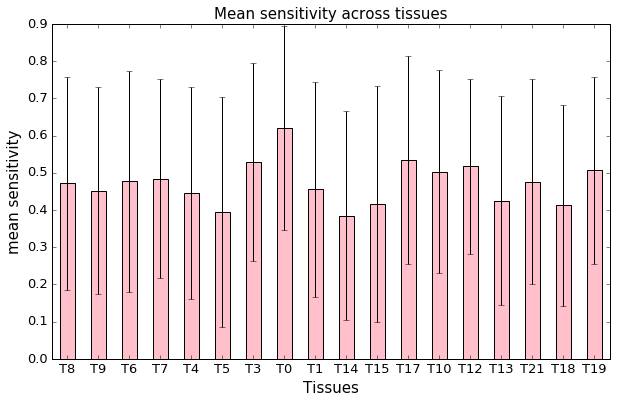

In [125]:
# plot tissue sensitivity to all drugs (mean and std)

drugs = df.columns[2:]
rows = []
for tissue in set(df["tissue"]):
    sens = df[df['tissue']==tissue][drugs].values.flatten()
    sens = sens[~np.isnan(sens)]
    rows.append({"tissue": tissue, "mean": np.mean(sens), "error": np.std(sens)})
tissue_mean_df = pd.DataFrame(rows)
tissue_mean_df.set_index("tissue", inplace=True)
tissue_mean_df = tissue_mean_df.transpose()
print tissue_mean_df

plt.figure(1, figsize=(10,6))
tissue_mean_df.loc['mean'].plot.bar(yerr=tissue_mean_df.loc["error"], rot=0, color="pink", fontsize=13)
plt.ylabel("mean sensitivity", fontsize=15)
plt.xlabel("Tissues", fontsize=15)
plt.title("Mean sensitivity across tissues", fontsize=15)
plt.show()


D0
tissue        T8        T9        T6        T7        T4        T5        T3  \
error   0.169392  0.265596  0.151167  0.000000  0.258623  0.077954  0.000000   
mean    0.290925  0.344259  0.260069  0.251328  0.295541  0.171037  0.176007   

tissue        T0        T1       T14       T15       T17       T10       T12  \
error   0.223723  0.175143  0.172960  0.126364  0.234398  0.147747  0.043659   
mean    0.493063  0.358973  0.255934  0.139189  0.344294  0.508673  0.495844   

tissue       T13       T21       T18       T19  
error   0.103782  0.000000  0.129563  0.146680  
mean    0.173499  0.366238  0.231448  0.382969  


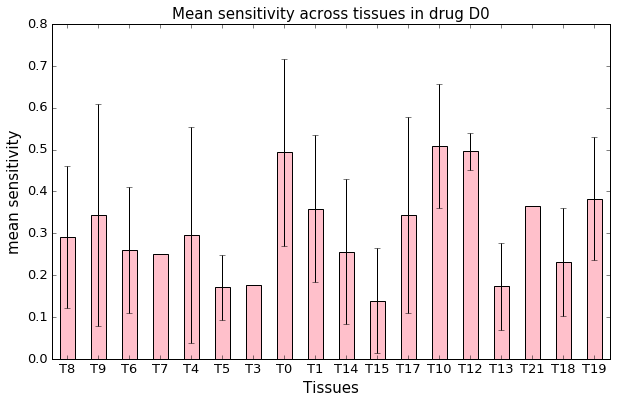

D1
tissue        T8        T9        T6        T7        T4        T5        T3  \
error   0.122471  0.000000  0.054126  0.000000  0.069069  0.103946  0.000000   
mean    0.776984  0.838903  0.838132  0.823051  0.787091  0.769894  0.925621   

tissue        T0        T1       T14       T15       T17       T10       T12  \
error   0.073675  0.058930  0.062880  0.000000  0.042784  0.041884  0.000000   
mean    0.903899  0.823123  0.774507  0.874122  0.843973  0.874779  0.883548   

tissue       T13       T21       T18       T19  
error   0.103649  0.000000  0.000000  0.000000  
mean    0.778838  0.887147  0.777978  0.866281  


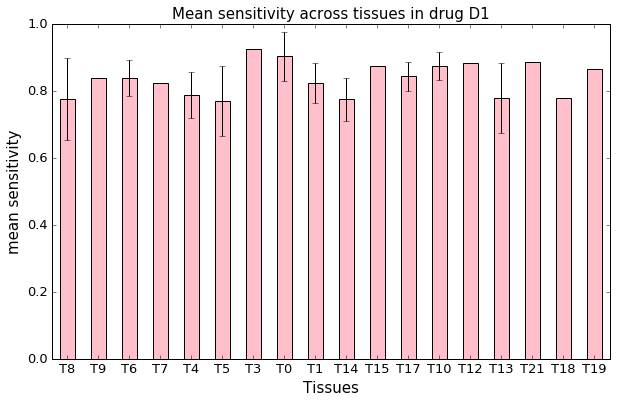

D11
tissue        T8        T9        T6      T7        T4        T5        T3  \
error   0.147294  0.099614  0.158383  0.0000  0.280237  0.299855  0.000000   
mean    0.692371  0.316752  0.705598  0.0985  0.461397  0.434247  0.817438   

tissue        T0        T1       T14       T15       T17       T10       T12  \
error   0.272572  0.253598  0.205873  0.254499  0.096502  0.272395  0.028599   
mean    0.637215  0.402292  0.248290  0.386090  0.810144  0.504939  0.503920   

tissue       T13       T21       T18       T19  
error   0.197433  0.000000  0.013989  0.175471  
mean    0.432522  0.591003  0.569216  0.539610  


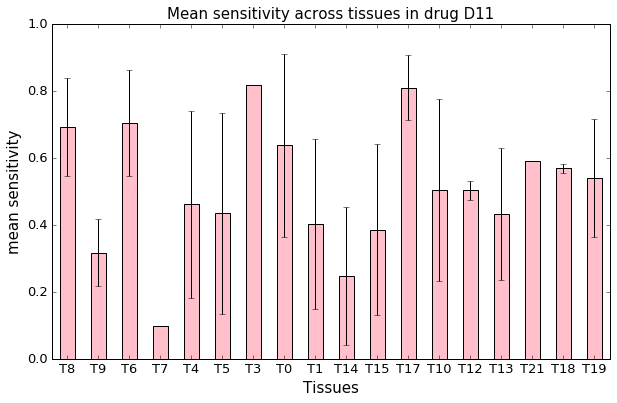

D12
tissue        T8        T9        T6        T7        T4        T5        T3  \
error   0.114259  0.034062  0.091672  0.000000  0.261957  0.314692  0.000000   
mean    0.783493  0.581191  0.804249  0.368123  0.609205  0.571351  0.820051   

tissue        T0        T1       T14       T15       T17       T10       T12  \
error   0.259171  0.147534  0.224243  0.284716  0.071069  0.268657  0.010583   
mean    0.713736  0.616905  0.369057  0.369494  0.887878  0.579961  0.603985   

tissue       T13       T21       T18       T19  
error   0.159662  0.000000  0.026478  0.149165  
mean    0.581325  0.505227  0.670009  0.605677  


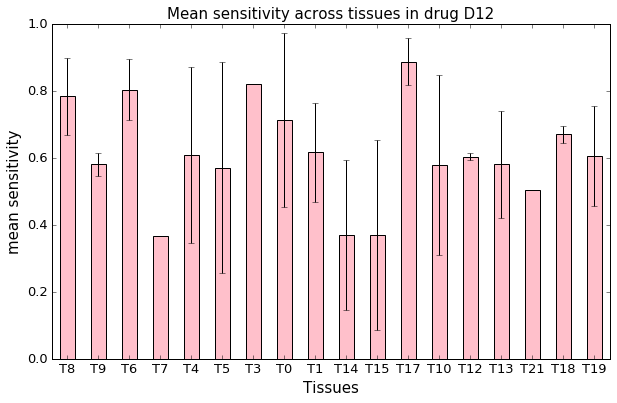

D13
tissue        T8        T9        T6        T7        T4        T5        T3  \
error   0.145122  0.000000  0.198012  0.000000  0.174865  0.043564  0.000000   
mean    0.205261  0.259212  0.499900  0.060497  0.229082  0.059240  0.520823   

tissue        T0        T1       T14       T15       T17       T10       T12  \
error   0.190561  0.117088  0.108244  0.201325  0.294326  0.171544  0.127828   
mean    0.429901  0.178920  0.118363  0.176150  0.380816  0.344712  0.317202   

tissue       T13      T21       T18       T19  
error   0.194686  0.00000  0.095587  0.076650  
mean    0.209106  0.36461  0.110411  0.344302  


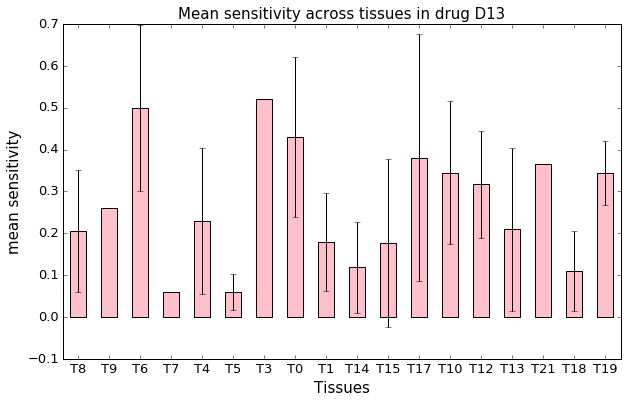

D14
tissue        T8        T9        T6       T7        T4        T5        T3  \
error   0.105624  0.059940  0.114843  0.00000  0.103124  0.123058  0.000000   
mean    0.625464  0.726007  0.684996  0.77515  0.654359  0.561068  0.503728   

tissue        T0        T1       T14       T15       T17       T10       T12  \
error   0.234513  0.060003  0.190608  0.237575  0.087172  0.067659  0.013282   
mean    0.731472  0.720449  0.481120  0.503128  0.660308  0.586525  0.782862   

tissue       T13       T21       T18       T19  
error   0.087557  0.000000  0.101607  0.076478  
mean    0.668953  0.640103  0.595951  0.658312  


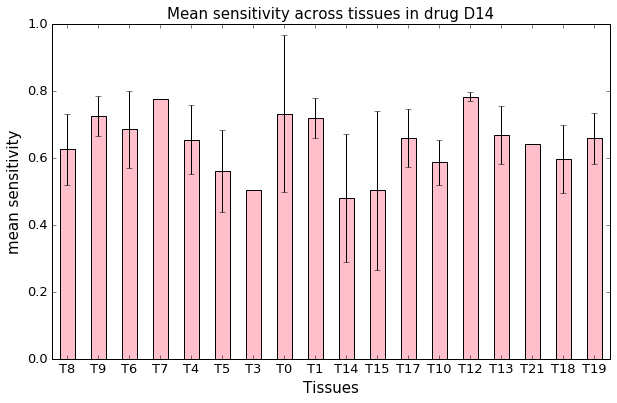

D15
tissue        T8        T9        T6        T7        T4        T5        T3  \
error   0.153284  0.000000  0.073661  0.000000  0.176637  0.134860  0.000000   
mean    0.163991  0.014824  0.112759  0.479092  0.187296  0.161482  0.387661   

tissue        T0        T1       T14       T15       T17       T10       T12  \
error   0.257693  0.164066  0.197892  0.159471  0.200131  0.202127  0.029006   
mean    0.569520  0.166841  0.264639  0.199172  0.353065  0.223636  0.473308   

tissue       T13       T21       T18       T19  
error   0.153877  0.000000  0.110647  0.028835  
mean    0.313985  0.052871  0.162318  0.413582  


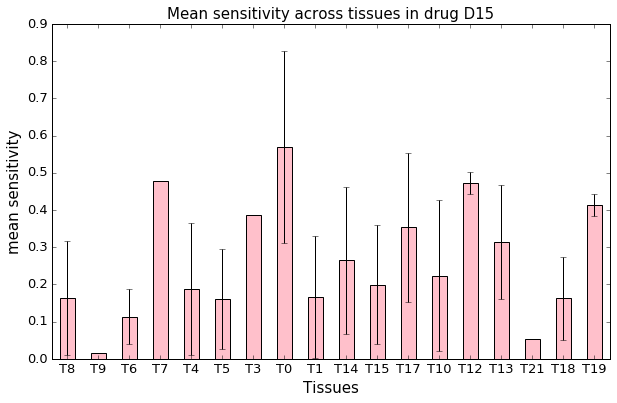

D16
tissue        T8        T9        T6        T7        T4        T5       T3  \
error   0.134568  0.020351  0.121195  0.000000  0.177286  0.184594  0.00000   
mean    0.387375  0.505784  0.472751  0.774507  0.417725  0.522336  0.48389   

tissue        T0        T1       T14       T15       T17       T10       T12  \
error   0.203814  0.115706  0.136106  0.052418  0.138879  0.142906  0.008312   
mean    0.670574  0.474792  0.326671  0.428863  0.464903  0.411054  0.557841   

tissue       T13       T21       T18       T19  
error   0.130865  0.000000  0.139417  0.088775  
mean    0.487084  0.639931  0.369323  0.462254  


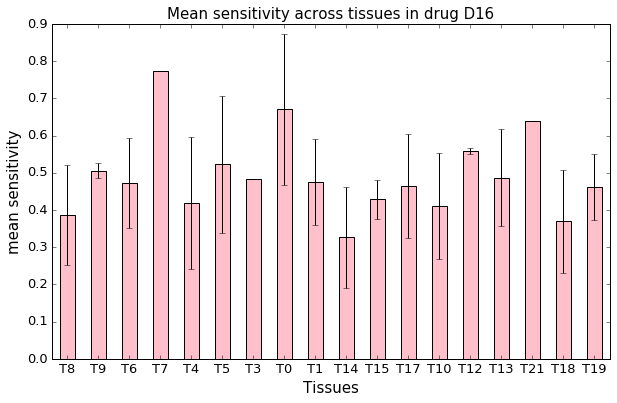

D17
tissue        T8        T9        T6        T7        T4        T5        T3  \
error   0.035151  0.047472  0.049833  0.000000  0.031157  0.013700  0.000000   
mean    0.897858  0.887746  0.883376  0.876778  0.900600  0.933105  0.959726   

tissue        T0        T1       T14       T15       T17       T10       T12  \
error   0.021631  0.036477  0.046822  0.013452  0.034591  0.030853  0.012511   
mean    0.978021  0.909977  0.917681  0.932719  0.924314  0.897344  0.885433   

tissue       T13       T21       T18       T19  
error   0.026987  0.000000  0.044152  0.014610  
mean    0.887958  0.927935  0.903920  0.921979  


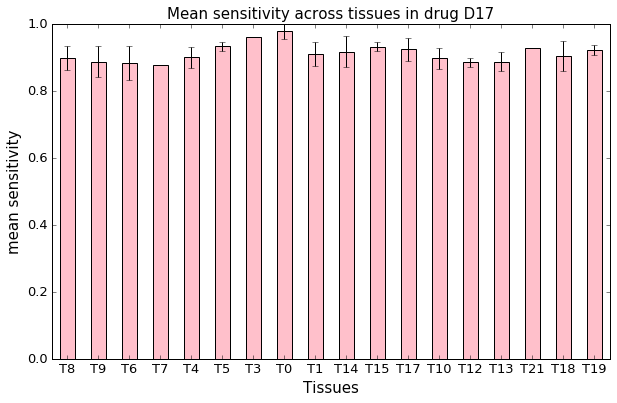

D19
tissue        T8        T9        T6        T7        T4        T5        T3  \
error   0.157211  0.006834  0.077343  0.000000  0.155368  0.271255  0.000000   
mean    0.514019  0.378042  0.547079  0.350643  0.519883  0.528449  0.700171   

tissue        T0        T1       T14       T15       T17       T10       T12  \
error   0.126695  0.144580  0.172087  0.188408  0.123804  0.130091  0.110861   
mean    0.691534  0.394146  0.402558  0.547444  0.621230  0.501677  0.572301   

tissue       T13       T21       T18       T19  
error   0.135798  0.000000  0.060690  0.138967  
mean    0.429672  0.482262  0.428813  0.359233  


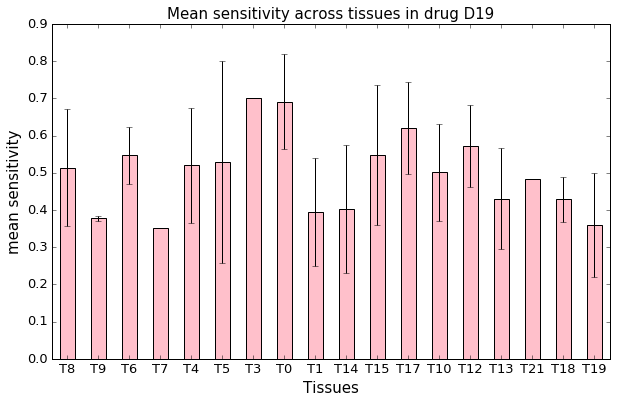

D2
tissue        T8        T9        T6        T7        T4        T5        T3  \
error   0.192142  0.034961  0.076842  0.000000  0.152796  0.176225  0.000000   
mean    0.328600  0.518252  0.111454  0.238132  0.303414  0.234062  0.335261   

tissue        T0        T1       T14       T15       T17       T10       T12  \
error   0.228274  0.178391  0.268699  0.105457  0.249193  0.170334  0.041302   
mean    0.435694  0.378611  0.490476  0.098086  0.399757  0.496597  0.234961   

tissue       T13       T21       T18       T19  
error   0.118299  0.000000  0.226778  0.213068  
mean    0.178109  0.253899  0.324464  0.711611  


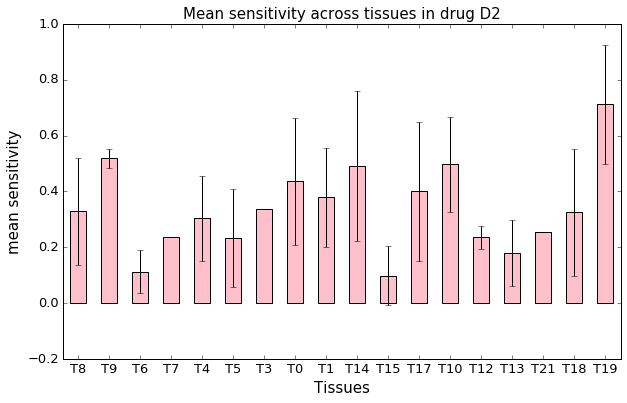

D20
tissue        T8        T9        T6        T7        T4        T5        T3  \
error   0.181616  0.128706  0.194197  0.000000  0.169677  0.162007  0.000000   
mean    0.249911  0.182905  0.263082  0.247644  0.264112  0.222208  0.460497   

tissue        T0        T1       T14       T15       T17       T10       T12  \
error   0.223870  0.188779  0.079952  0.233819  0.149196  0.108374  0.026328   
mean    0.472125  0.222237  0.147879  0.354370  0.370919  0.270486  0.516088   

tissue       T13       T21       T18       T19  
error   0.137949  0.000000  0.047001  0.010111  
mean    0.258155  0.337404  0.194859  0.447815  


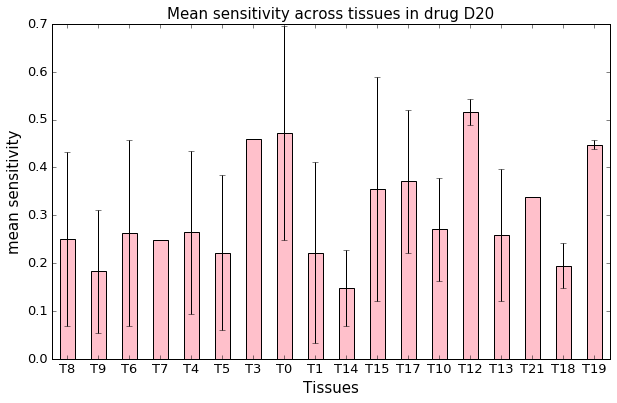

D21
tissue        T8        T9        T6        T7        T4        T5        T3  \
error   0.215725  0.057798  0.121130  0.000000  0.182027  0.131552  0.000000   
mean    0.294079  0.188046  0.258419  0.398158  0.237311  0.170780  0.514867   

tissue        T0        T1       T14       T15       T17       T10       T12  \
error   0.227788  0.145270  0.122264  0.140737  0.187987  0.232303  0.037639   
mean    0.496397  0.152861  0.216774  0.150100  0.280477  0.292563  0.185497   

tissue       T13       T21       T18       T19  
error   0.175735  0.000000  0.107626  0.127935  
mean    0.193242  0.136975  0.122451  0.142759  


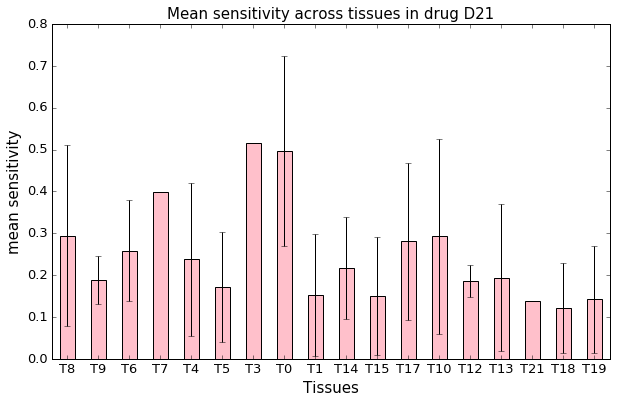

D22
tissue        T8        T9        T6        T7        T4        T5        T3  \
error   0.179705  0.000000  0.151570  0.000000  0.158242  0.016709  0.000000   
mean    0.183742  0.014824  0.150807  0.204884  0.195627  0.037618  0.079949   

tissue        T0        T1       T14       T15       T17       T10       T12  \
error   0.240793  0.109665  0.225586  0.074788  0.205161  0.217819  0.128985   
mean    0.558728  0.126187  0.215737  0.119980  0.266577  0.294736  0.182798   

tissue       T13       T21       T18       T19  
error   0.140380  0.000000  0.014953  0.199529  
mean    0.137938  0.014824  0.029777  0.214353  


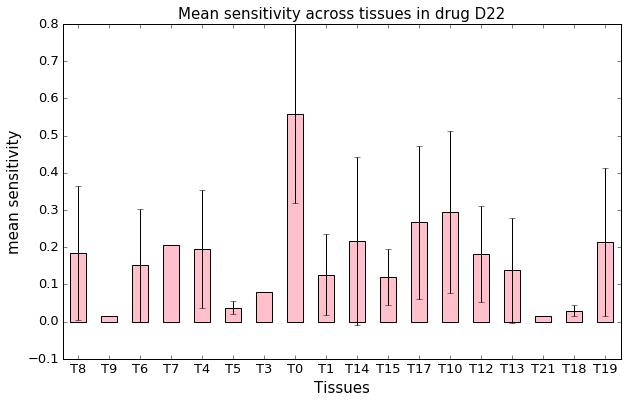

D23
tissue        T8        T9        T6        T7        T4        T5        T3  \
error   0.251333  0.144644  0.175840  0.000000  0.234324  0.025075  0.000000   
mean    0.341594  0.177035  0.607848  0.211011  0.343629  0.226292  0.320566   

tissue        T0        T1       T14       T15       T17       T10       T12  \
error   0.267901  0.246295  0.208410  0.183463  0.161430  0.174779  0.145201   
mean    0.435441  0.339619  0.326671  0.351657  0.299475  0.454284  0.342931   

tissue       T13       T21       T18       T19  
error   0.160179  0.000000  0.146230  0.026028  
mean    0.244756  0.428749  0.302228  0.384683  


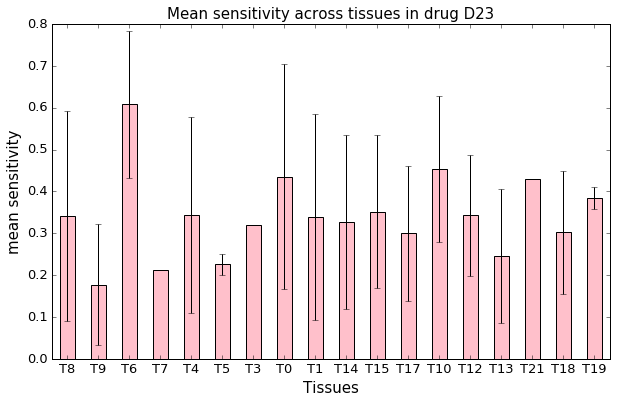

D3
tissue        T8        T9        T6        T7        T4        T5       T3  \
error   0.121176  0.000000  0.083310  0.000000  0.131395  0.069269  0.00000   
mean    0.208363  0.342202  0.144841  0.709083  0.235733  0.161697  0.10497   

tissue        T0        T1       T14       T15       T17       T10       T12  \
error   0.181207  0.152706  0.095548  0.000000  0.185289  0.108497  0.068830   
mean    0.547356  0.226359  0.217100  0.014824  0.330433  0.274821  0.222215   

tissue       T13       T21       T18       T19  
error   0.116164  0.000000  0.142909  0.129306  
mean    0.226295  0.110326  0.298907  0.479863  


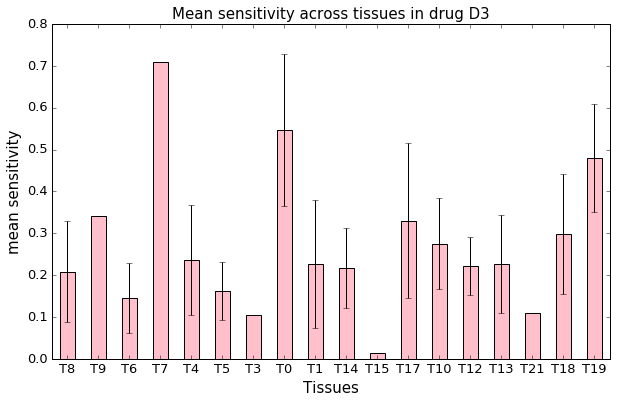

D4
tissue        T8        T9        T6        T7        T4        T5       T3  \
error   0.038464  0.016410  0.050476  0.000000  0.051133  0.115435  0.00000   
mean    0.954904  0.885304  0.953585  0.922879  0.947581  0.906113  0.97832   

tissue        T0        T1       T14       T15       T17       T10       T12  \
error   0.036000  0.040385  0.067839  0.012774  0.061023  0.021192  0.028149   
mean    0.983128  0.931515  0.931418  0.987461  0.941831  0.973142  0.948800   

tissue       T13       T21       T18       T19  
error   0.025587  0.000000  0.101371  0.048715  
mean    0.954936  0.949614  0.850643  0.929092  


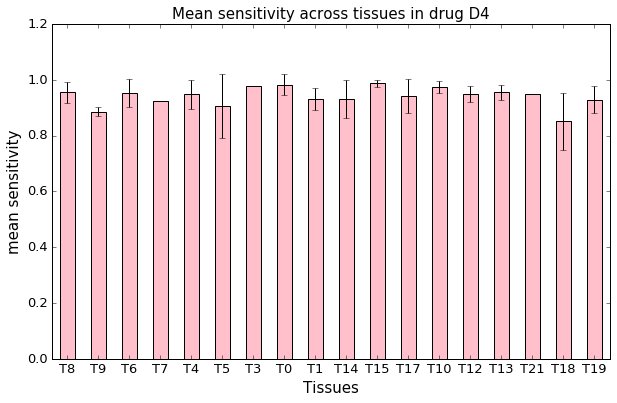

D5
tissue        T8        T9        T6        T7        T4        T5       T3  \
error   0.119544  0.023779  0.150634  0.000000  0.162566  0.157352  0.00000   
mean    0.293630  0.374250  0.264846  0.757584  0.294354  0.181534  0.46671   

tissue        T0        T1       T14       T15       T17       T10       T12  \
error   0.251414  0.151399  0.140399  0.200714  0.141764  0.133703  0.049871   
mean    0.570908  0.405891  0.303003  0.254841  0.381345  0.247778  0.496487   

tissue       T13       T21       T18       T19  
error   0.160786  0.000000  0.095973  0.078385  
mean    0.245370  0.353942  0.325750  0.244452  


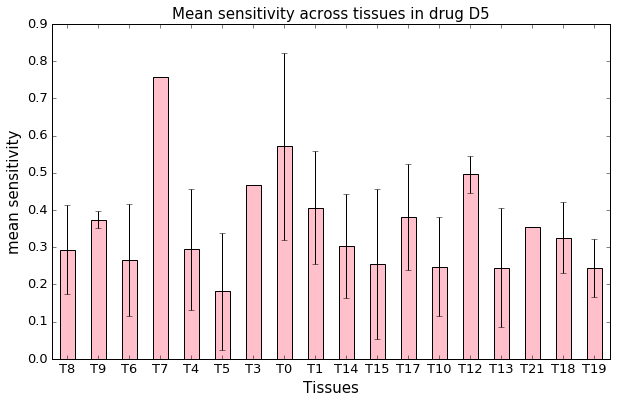

D6
tissue        T8        T9        T6        T7        T4        T5        T3  \
error   0.114005  0.012382  0.037117  0.000000  0.100695  0.202457  0.000000   
mean    0.765093  0.872022  0.825164  0.801971  0.757982  0.709569  0.892459   

tissue        T0        T1       T14       T15       T17       T10       T12  \
error   0.109651  0.078443  0.271744  0.043770  0.076460  0.081706  0.002271   
mean    0.890146  0.811485  0.597652  0.911311  0.830813  0.830499  0.859597   

tissue       T13       T21       T18       T19  
error   0.099177  0.000000  0.038582  0.015981  
mean    0.784462  0.883376  0.738368  0.855741  


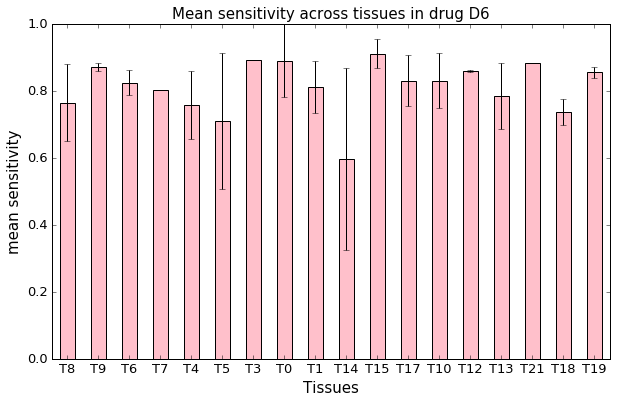

D7
tissue        T8        T9        T6       T7        T4        T5        T3  \
error   0.171969  0.000000  0.140755  0.00000  0.197992  0.216028  0.000000   
mean    0.489849  0.732134  0.421151  0.53162  0.477876  0.441959  0.311997   

tissue        T0        T1       T14       T15       T17       T10       T12  \
error   0.270695  0.164204  0.146442  0.165446  0.169380  0.175823  0.005763   
mean    0.493680  0.514193  0.448899  0.479791  0.566806  0.574281  0.412404   

tissue       T13       T21       T18       T19  
error   0.180258  0.000000  0.063946  0.091281  
mean    0.396290  0.608912  0.385368  0.560561  


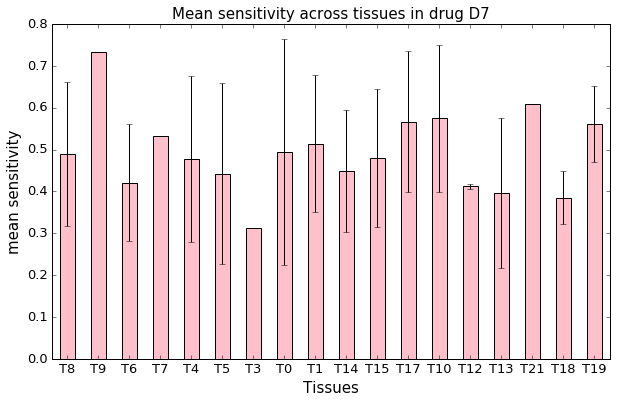

D8
tissue        T8        T9        T6        T7        T4        T5        T3  \
error   0.210467  0.161118  0.202466  0.000000  0.204687  0.206250  0.000000   
mean    0.462702  0.441752  0.335568  0.429734  0.420516  0.360825  0.384447   

tissue        T0        T1       T14       T15       T17       T10       T12  \
error   0.270566  0.180672  0.257448  0.259296  0.232310  0.211452  0.083847   
mean    0.443466  0.541327  0.388976  0.405927  0.482991  0.562664  0.636375   

tissue       T13       T21       T18       T19  
error   0.217584  0.000000  0.017438  0.299529  
mean    0.425187  0.667181  0.683333  0.451028  


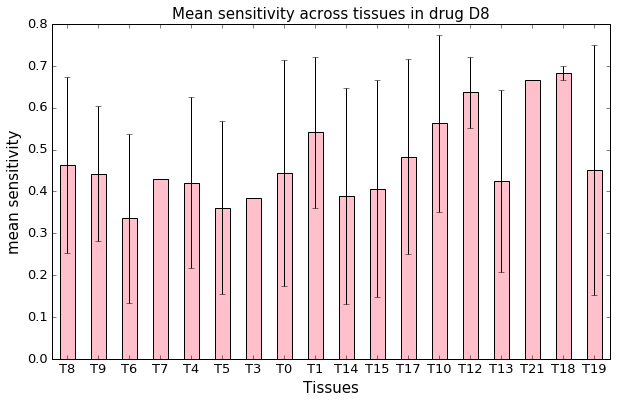

D9
tissue        T8        T9        T6        T7        T4        T5        T3  \
error   0.185494  0.017802  0.095715  0.000000  0.142151  0.212368  0.000000   
mean    0.414673  0.334212  0.319116  0.350257  0.319198  0.311368  0.489117   

tissue        T0        T1       T14       T15       T17       T10       T12  \
error   0.196311  0.171704  0.110377  0.136852  0.111531  0.216465  0.164075   
mean    0.557729  0.309209  0.220660  0.496401  0.410925  0.309108  0.441538   

tissue       T13       T21       T18       T19  
error   0.109655  0.000000  0.017823  0.007305  
mean    0.373785  0.274979  0.178235  0.364332  


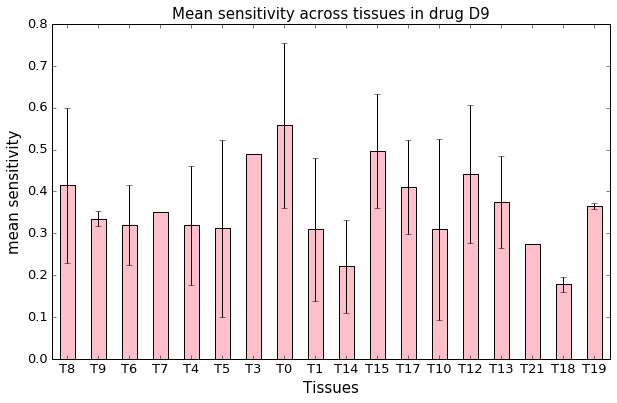

In [126]:
# plot tissue sensitivity to every drugs(mean and std)

drugs = df.columns[2:]
for drug in drugs:
    print drug
    rows = []
    for tissue in set(df["tissue"]):
        sens = df[df['tissue']==tissue][drug].values.flatten()
        sens = sens[~np.isnan(sens)]
        rows.append({"tissue": tissue, "mean": np.mean(sens), "error": np.std(sens)})
    tissue_drug_mean_df = pd.DataFrame(rows)
    tissue_drug_mean_df.set_index("tissue", inplace=True)
    tissue_drug_mean_df = tissue_drug_mean_df.transpose()
    print tissue_drug_mean_df

    plt.figure(drug, figsize=(10,6))
    tissue_drug_mean_df.loc['mean'].plot.bar(yerr=tissue_drug_mean_df.loc["error"], rot=0, color="pink", fontsize=13)
    plt.ylabel("mean sensitivity", fontsize=15)
    plt.xlabel("Tissues", fontsize=15)
    plt.title("Mean sensitivity across tissues in drug " + drug, fontsize=15)
    plt.show()

